# PSLG overlaying



## Терминология


* **ППЛГ** &ndash; плоский прямолинейный граф (**PSLG**).

* **РСДС** &ndash; реберный список с двойными связями (**DCEL**, doubly-connected edge list).

* **ППЛГ** удобно хранить с помощью **РСДС**.


## Задача
На вход подаются многоугольники, необходимо найти их наложение. Сведем к задаче о наложении двух РСДС: по двум РСДС $S_1$ и $S_2$ необходимо построить РСДС для $O(S_1,S_2)$.



<img src="images/построение_пплг.png" />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
</sub>
</div>

## Алгоритм

Алгоритм работает в три этапа:
   *  Нахождение информации о ребрах $O(S_1,S_2)$.
   *  Построение граней $O(S_1,S_2)$.
   *  Связать грани из $O(S_1,S_2)$ с гранями из $S_1$ и $S_2$.

### Нахождение информации о ребрах $O(S_1,S_2)$

## Заметающая прямая 


<img src="images/заметающая_прямая.png" width="310"/>
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
<br>
</sub>
<br>
</div>



* **Время** &ndash; $O((n+k)\cdot log(n))$, где $k$ &ndash; количество пересечений
* **Память** &ndash; $O(n)$



Нахождение пересечений ребер из $S_1$ и $S_2$ базируется на алгоритме "заметающей прямой" с небольшими изменениями.


#### Необходимые структуры данных

* очередь событий $Q$;
* статус $T$, в котором будем хранить полуребра, ориентированные слева направо.


## Обработка ребер


* Скопируем РСДС $S_1$ и $S_2$ в новый РСДС.

* На новом РСДС запускаем алгоритм заметающей прямой на множестве ребер, являющимся объединением ребер из $S_1$ и $S_2$. 

* Переиспользуем вершины, в которые входят ребра только одного РСДС.

* Меняем РСДС для остальных вершин. 
     * Пусть у нас есть два ребра $e_1$, $e_2$ и вершина $v$ &ndash; событие на заметающей прямой. 

 ## Возможны следующие случаи:
 

          

 * вершина ребра $e_2$ проходит через ребро $e_1$, разбивая его на два новых ребра;

 * ребро $e_1$ пересекает ребро $e_2$ и образуется четыре новых ребра;

 * ребра $e_1$ и $e_2$ пересекаются в вершине;

 * вершина ребра $e_1$ проходит через ребро $e_2$, разбивая его на два новых ребра;

 *  ребра $e_1$ и $e_2$ имеют общий отрезок и образуют новое ребро.

<img src="images/варианты пересечения ребер.png" />
<br>
<div style="padding-left:230px">
<br>
<sub>
<br>
Викиконспекты, "Пересечение многоугольников"
</sub>
</div>

## Рассмотрим $4$ случай



* Получим новые полуребра.

* Разберемся с $Twin()$.

* Разберемся с $Prev()$ и $Next()$.

## Получим новые полуребра

<img src="images/twinsh1h2.png" />
<div style="padding-left:230px">
</div>

## Разберемся с $Twin()$


<img src="images/twin.png"/>
<div style="padding-left:230px">
</div>

## Разберемся с $Prev()$  и $Next()$

* Для ребер, заканчивающихся и начинающихся на концах ребра $e$, легко определить $Next()$ и $Prev()$ соответственно, скопировав их для ребра $e$. 


<img src="images/prev1.png" width="400" />
<div style="padding-left:230px">
</div>

## Разберемся с $Prev()$ и $Next()$


* $Prev()$ и $Next()$ для ребер, заканчивающихся в вершине $v$.

<img src="images/prev2.png" width="400" />
<div style="padding-left:230px">
</div>



### Чтобы получить информацию о ребрах, необходимо:

* Скопировать РСДС $S_1$ и $S_2$ в новый РСДС.

* Запустить алгоритм заметающей прямой, во время которого надо создать новые ребренные связи.



**Время работы** &ndash; $O\left(\left(n + k\right)\cdot\log n\right)$

## Построение граней $O(S_1,S_2)$



1) для каждой грани $f$ просчитать $InnerComponents(f)$ и $OuterComponent(f)$;

  *  $InnerComponents(f)$ &ndash; список указателей на полуребра внутренних границ.
  
  *  $OuterComponent(f)$ &ndash; указатель на полуребро внешней границы $f$.
    
    
2) установить $IncidentFace()$ для каждого полуребра.




## Контур

$контур$ &ndash; это цикл, получившийся в результате последовательного прохода по ребрам с возвращеним в исходную точку.



* Найдем все контуры.

* Контур &ndash; граница грани или дырки?

* Какие границы принадлежат одной грани?


## Контур &ndash; граница грани или дырки?

Рассмотрим самую нижнюю вершину ($v$) контура.

* Поворот для полуребер контура, инцидентных вершине $v$ &ndash; левый, тогда контур &ndash; граница грани, иначе &ndash; граница дырки.

<img src="images/углы.png" width="250"/>
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
 <br>
 <br>
</sub>
</div>

## Какие границы принадлежат одной грани?

* Добавим внешнюю бесконечную фиктивную грань.
* Граф $G$ &ndash; для каждого контура будет вершина.
* Вершина в графе $G$ &ndash; граница бесконечной грани. 


Рассмотрим любые две вершины $e_i$ и $e_j$ из графа $G$. 




* $e_i$ &ndash; граница дырки, а $e_j$ &ndash; ближайшая снизу по отношению к самой нижней вершине границы $e_i$, граница грани. 
    *  Тогда $e_i$ &ndash; внутренняя грань для $e_j$;
    

   
*  $e_i$ &ndash; граница дырки, а $e_j$ &ndash; ближайшая снизу по отношению к самой нижней вершине границы $e_i$, граница дырки. 
    * Тогда $e_i$ &ndash; внутренняя грань внешней грани $e_j$;
    


* для контура $e_i$ нет ближайшего снизу контура. Тогда $e_i$ $-$ внутренняя грань для фиктивной бесконечной грани.


#### Проведем ребра между двумя вершинами
   * если одна является дыркой другой;
   * если одна является дыркой той же грани, что и другая.

<img src="images/граф.png" width=300 />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
 <br>
 <br>
</sub>
</div>

**Теорема** 
> Каждая компонента связности графа $G$ соответсвует множеству контуров, инцидентных одной грани.




* Создадим для каждй компоненты связности по грани. 
<br>
* Зададим $IncidentFace$ для каждого полуребра из границы грани $f$. 
<br>
* Создадим список $InnerComponents(f)$ и $OuterComponent(f)$.



## Построение графа $G$



### Заметающая прямая

<img src="images/построение.png" width="250" />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
 <br>
 <br>
</sub>
</div>


## Чтобы получить информацию о гранях, нужно:



* Найти все контуры в структуре, полученной из первой части алгоритма.



* Для каждого контура определить, чем он является: границей дырки или границей грани.



* Для каждого контура создать вершину графа $G$.



* Для каждого полуребра создать ссылку на вершину графа $G$, содержащую данное полуребро.



* Запустить алгоритм заметающей прямой и построить ребра граней $G$.



* Найти все компоненты связности графа $G$ и по ним построить грани и ссылки, связанные с гранями.


**Время работы** &ndash; $O\left(n + k\right)$


result=POLYGON ((3 2, 6 3, 7 2, 3 2))


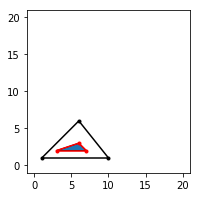

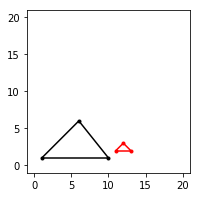

In [1]:
import solutions 

p1=[[1, 1], [6, 6], [10, 1]]
p2=[[3, 2], [6, 3], [7, 2]]
p3=[[11, 2], [12, 3], [13, 2]]

solutions.show_test(p1,p2)
solutions.show_test(p1,p3)

## Связка граней из $O(S_1,S_2)$ с гранями из $S_1$ и $S_2$



## Найдем исходные грани для грани $f$ из $O(S_1,S_2)$

## Рассмотрим вершину $v$ грани $f$:

* $v$ &ndash; пересечение ребера $e_1$ из $S_1$ с ребром $e_2$ из $S_2$
     * $IncidentFace()$ в полуребрах, соответствующих ребрам $e_1$ и $e_2$

* $v$ &ndash; не пересечение, а вершина из $S_1$
     * грань из $S_1$ &ndash; тривиально;
     * грань из $S_2$ &ndash; алгоритм заметающей прямой.

### Чтобы пометить каждую грань из $O(S_1,S_2)$ гранями из $S_1$ и $S_2$, надо:



* Связать каждую вершину из $S_1$ c гранями из $S_2$.



* Связать каждую вершину из $S_2$ с гранями из $S_1$.



* Рассмотреть любую вершину из каждой грани из $O(S_1,S_2)$. 


**Время работы** &ndash; $O\left(\left(n + k\right)\cdot\log n\right)$


## Краткое описание алгоритма

На вход получаем два РСДС $S_1$ и $S_2$.
Возвращаем $O(S_1,S_2)$ в виде РСДС.

* Скопировать ребра $S_1$ в список ребер $S_2$ и получить новый реберный список.

* Запустить алгоритм заметающей прямой, во время которого надо создать новые ребренные связи.

* В результате предыдущего шага получить $D$ - реберный список $O(S_1,S_2)$.

* Найти все циклы в реберном списке $D$.

* Для каждого цикла определить, чем он является: границей дырки или границей грани.

## Краткое описание алгоритма


* Для каждого цикла создать вершину графа $G$.

* Для каждого полуребра создать ссылку на вершину графа $G$, содержащую данное полуребро.

* Запустить алгоритм заметающей прямой и построить ребра граней $G$.

* Найти все компоненты связности графа $G$ и по ним построить грани и ссылки, связанные с гранями.

* Пометить каждую грань из $O(S_1,S_2)$ гранями из $S_1$ и $S_2$.

**Время работы** &ndash; $O\left(\left(n + k\right)\cdot\log n\right)$

result=POLYGON ((5.775280898876405 2.910112359550562, 6 1, 2.923076923076923 1.769230769230769, 5.775280898876405 2.910112359550562))


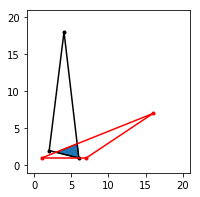

In [2]:
import solutions

p1=[[2, 2], [4, 18], [6, 1]]
p2=[[1, 1], [16, 7], [7, 1]]

solutions.show_test(p1,p2)